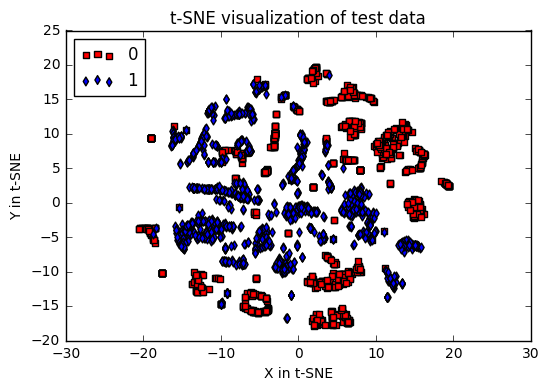

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#Load the Dataset
dataframe_KDD = pd.read_csv("D:\\Final Year Project\\KDDTrain+_20Percent.csv")
#dataframe_KDD
#Converting the categorical variables to numeric

number = LabelEncoder()
dataframe_KDD['protocol_type'] = number.fit_transform(dataframe_KDD['protocol_type'].astype('str'))
dataframe_KDD['service'] = number.fit_transform(dataframe_KDD['service'].astype('str'))
dataframe_KDD['flag'] = number.fit_transform(dataframe_KDD['flag'].astype('str'))
dataframe_KDD['class'] = number.fit_transform(dataframe_KDD['class'].astype('str'))
#dataframe_KDD.head()

x = dataframe_KDD.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

y = dataframe_KDD.ix[:,-1].values
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

In [24]:
import pandas as pd
import numpy as np
dataframe_KDD = pd.read_csv("D:\\Final Year Project\\KDDTrain+_20Percent.csv")
dataframe_KDD.service.unique()
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(dataframe_KDD["service"]))
dataframe_KDD["service_coded"] = coding(dataframe_KDD["service"], {'ftp_data':10,'other':11})
print ('\nAfter Coding:')
#dataframe_KDD['service']
print (pd.value_counts(dataframe_KDD["service"]))
dataframe_KDD.dtypes
dataframe_KDD['class']

Before Coding:
http           8003
private        4351
domain_u       1820
smtp           1449
ftp_data       1396
eco_i           909
other           858
ecr_i           613
telnet          483
finger          366
ftp             345
auth            189
Z39_50          172
courier         164
uucp            157
time            155
bgp             146
whois           145
imap4           138
uucp_path       133
iso_tsap        131
ctf             127
urp_i           124
nnsp            123
supdup          114
http_443        113
csnet_ns        111
efs             110
domain          109
gopher          109
               ... 
exec             91
mtp              90
ldap             90
systat           88
netbios_dgm      85
link             85
login            79
netstat          78
netbios_ns       76
kshell           67
netbios_ssn      67
sunrpc           67
echo             65
nntp             61
ssh              58
pop_3            53
sql_net          46
IRC              40
ntp_u

0         normal
1         normal
2        anomaly
3         normal
4         normal
5        anomaly
6        anomaly
7        anomaly
8        anomaly
9        anomaly
10       anomaly
11       anomaly
12        normal
13       anomaly
14       anomaly
15       anomaly
16        normal
17       anomaly
18        normal
19        normal
20       anomaly
21       anomaly
22        normal
23        normal
24       anomaly
25        normal
26       anomaly
27        normal
28        normal
29        normal
          ...   
25162     normal
25163    anomaly
25164     normal
25165     normal
25166    anomaly
25167     normal
25168     normal
25169     normal
25170    anomaly
25171    anomaly
25172    anomaly
25173     normal
25174    anomaly
25175     normal
25176     normal
25177     normal
25178    anomaly
25179    anomaly
25180    anomaly
25181    anomaly
25182    anomaly
25183    anomaly
25184     normal
25185     normal
25186     normal
25187    anomaly
25188    anomaly
25189    anoma